In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import scipy.stats as stats

data_path = '/content/drive/MyDrive/Colab Notebooks/MLdatasets/Credit_card_trans/credit_card_transactions.csv'

In [6]:
card_df = pd.read_csv(data_path) #считываем данные

card_df #смотрим данные

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [ ]:
card_df.info() #узнаем типы данных столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
print(card_df['merchant'].unique()) #Получаем наименования всех продавцов из данных

['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud_Mosciski,

In [ ]:
print(card_df['merchant'].value_counts()) #Подсчет количества транзакций у каждого продавца

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64


In [ ]:
# Создадим массив
merch_arr = card_df['merchant'].value_counts()

<BarContainer object of 10 artists>

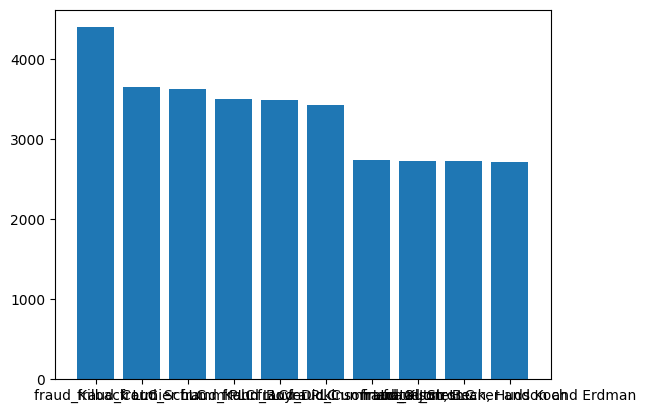

In [ ]:
#Создадим диограмму на основе данных
plt.bar(merch_arr.index[:10] , merch_arr.values[:10])

In [ ]:
# Узнаем медиану, среднее и моду из генеральной совокупности
median_arr = np.median(merch_arr.values)
mode_arr = stats.mode(merch_arr.values)
mean_arr = np.mean(merch_arr.values)
print("Медиана:" ,median_arr)
print("Мода: ", mode_arr)
print("Среднее:", mean_arr)

Медиана: 1863.0
Мода:  ModeResult(mode=1836, count=6)
Среднее: 1871.1038961038962


In [ ]:
# Узнаем медиану, среднее и моду из выборки 50 значений
sl_median_arr = np.median(merch_arr.values[:100])
sl_mode_arr = stats.mode(merch_arr.values[:100])
sl_mean_arr = np.mean(merch_arr.values[:100])
print("Медиана:" ,sl_median_arr)
print("Мода: ", sl_mode_arr)
print("Среднее:", sl_mean_arr)

Медиана: 2562.5
Мода:  ModeResult(mode=2503, count=3)
Среднее: 2643.74


In [2]:
# Узнав о библиотеке seaborn я решил ее протестировать
import seaborn as sns

In [9]:
# Возьмем первые десять категорий покупок для для анализа
arr_category = card_df['category'].unique()

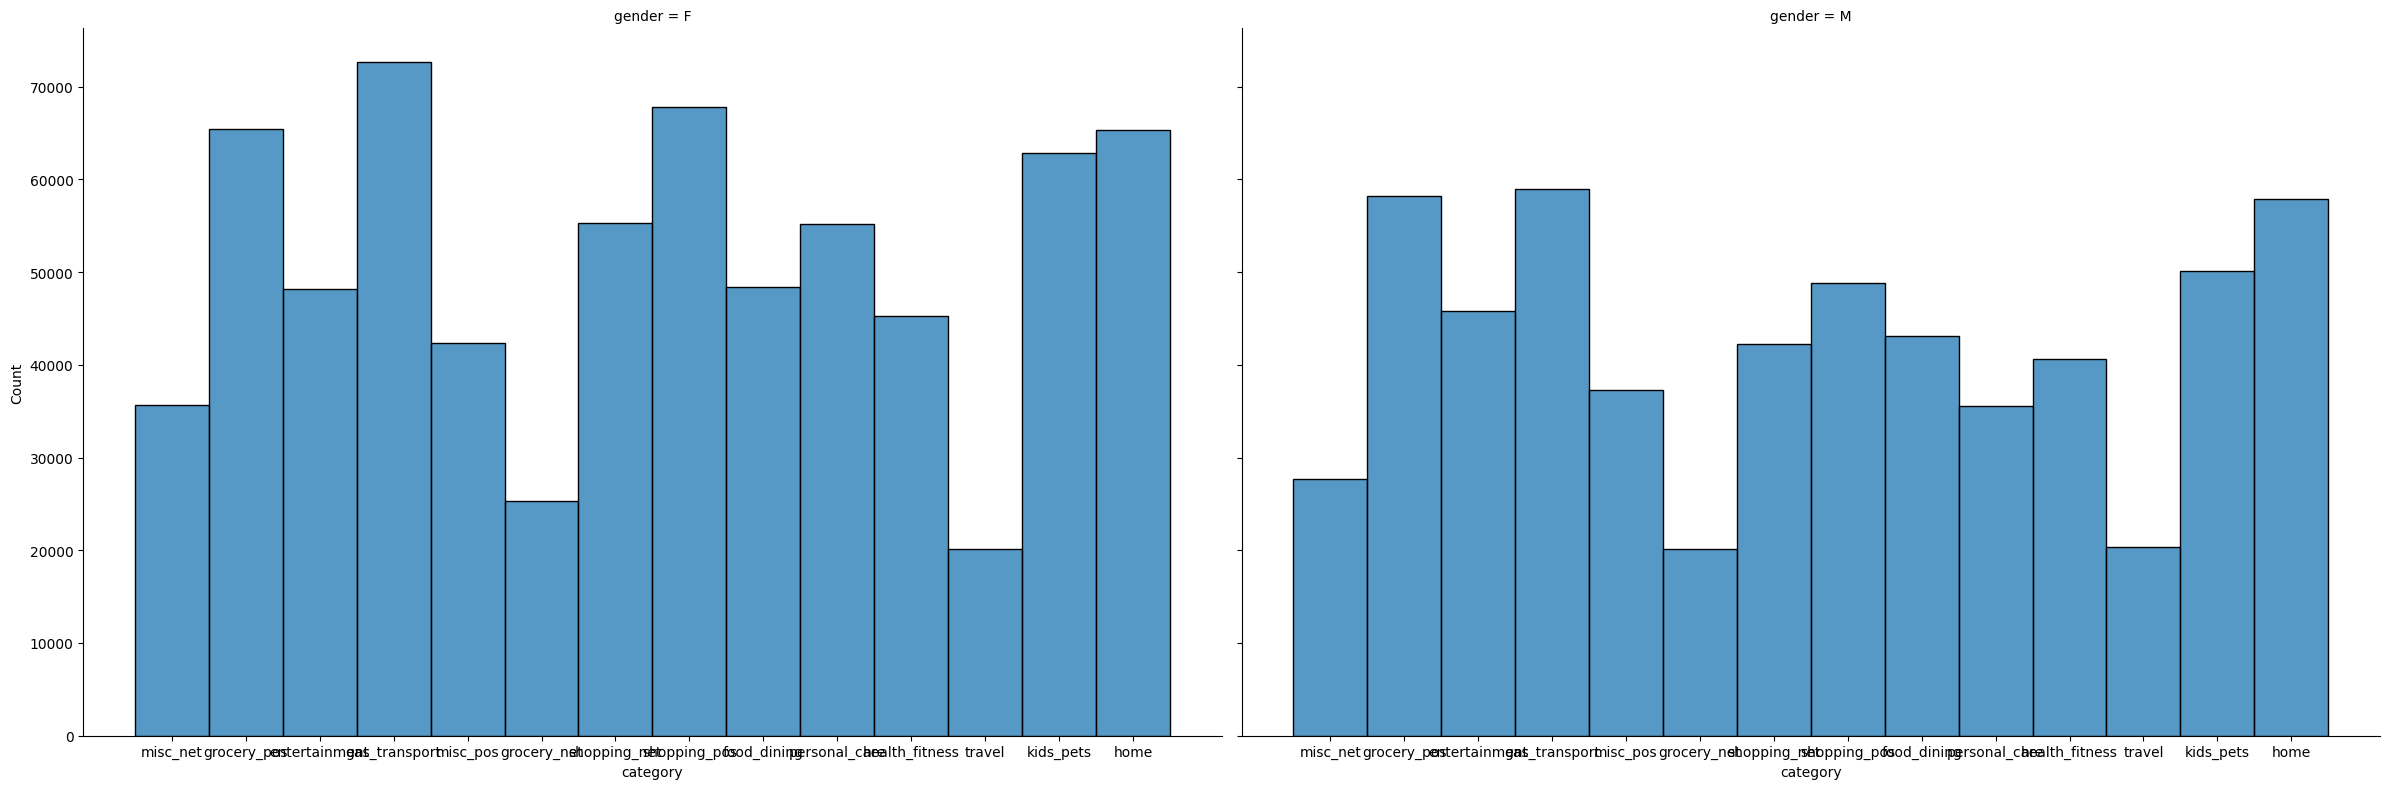

In [33]:
col_label = sns.displot(data= card_df, x = 'category', col = 'gender', aspect=1.5, height=12)